In [1]:
import scipy.io as sio
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

folder = '/path/ to/ target subjects';

mat = sio.loadmat(os.path.join(folder, 'violin_plot_data.mat'))

In [2]:
Target_1_MRF_T1_ROI_GM_voxels = mat['Target_1_MRF_T1_ROI_GM_voxels']
Target_1_MRF_T1_ROI_WM_voxels = mat['Target_1_MRF_T1_ROI_WM_voxels']
Target_1_MRF_T2_ROI_GM_voxels = mat['Target_1_MRF_T2_ROI_GM_voxels']
Target_1_MRF_T2_ROI_WM_voxels = mat['Target_1_MRF_T2_ROI_WM_voxels']

Target_2_MRF_T1_ROI_GM_voxels = mat['Target_2_MRF_T1_ROI_GM_voxels']
Target_2_MRF_T1_ROI_WM_voxels = mat['Target_2_MRF_T1_ROI_WM_voxels']
Target_2_MRF_T2_ROI_GM_voxels = mat['Target_2_MRF_T2_ROI_GM_voxels']
Target_2_MRF_T2_ROI_WM_voxels = mat['Target_2_MRF_T2_ROI_WM_voxels']

In [4]:
T1_values = np.concatenate((Target_1_MRF_T1_ROI_GM_voxels, Target_2_MRF_T1_ROI_GM_voxels,  
                              Target_1_MRF_T1_ROI_WM_voxels, Target_2_MRF_T1_ROI_WM_voxels), axis=0)

T2_values = np.concatenate((Target_1_MRF_T2_ROI_GM_voxels, Target_2_MRF_T2_ROI_GM_voxels, 
                              Target_1_MRF_T2_ROI_WM_voxels, Target_2_MRF_T2_ROI_WM_voxels), axis=0)

T1_class_name = np.array(['Lt'] * len(Target_1_MRF_T1_ROI_GM_voxels) + ['Rt'] * len(Target_2_MRF_T1_ROI_GM_voxels) + 
                        ['Lt'] * len(Target_1_MRF_T1_ROI_WM_voxels) + ['Rt'] * len(Target_2_MRF_T1_ROI_WM_voxels))

T1_region = np.array(['GM'] * len(Target_1_MRF_T1_ROI_GM_voxels) + ['GM'] * len(Target_2_MRF_T1_ROI_GM_voxels) +
                  ['WM'] * len(Target_1_MRF_T1_ROI_WM_voxels) + ['WM'] * len(Target_2_MRF_T1_ROI_WM_voxels))

T2_class_name = np.array(['Lt'] * len(Target_1_MRF_T2_ROI_GM_voxels) + ['Rt'] * len(Target_2_MRF_T2_ROI_GM_voxels) + 
                        ['Lt'] * len(Target_1_MRF_T2_ROI_WM_voxels) + ['Rt'] * len(Target_2_MRF_T2_ROI_WM_voxels))

T2_region = np.array(['GM'] * len(Target_1_MRF_T2_ROI_GM_voxels) + ['GM'] * len(Target_2_MRF_T2_ROI_GM_voxels) +
                  ['WM'] * len(Target_1_MRF_T2_ROI_WM_voxels) + ['WM'] * len(Target_2_MRF_T2_ROI_WM_voxels))

T1_df = pd.DataFrame({'Values': np.squeeze(T1_values), 'Groups': T1_class_name, 'Region': T1_region})
T2_df = pd.DataFrame({'Values': np.squeeze(T2_values), 'Groups': T2_class_name, 'Region': T2_region})

<function matplotlib.pyplot.close(fig=None)>

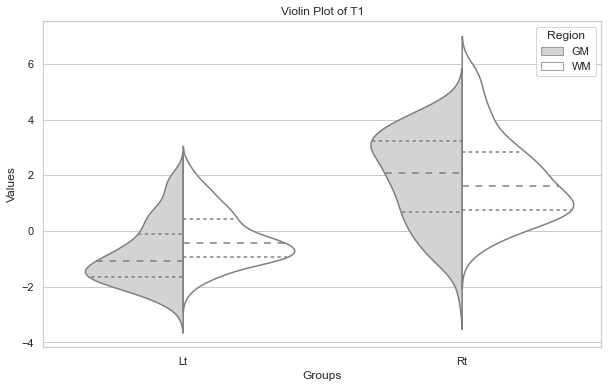

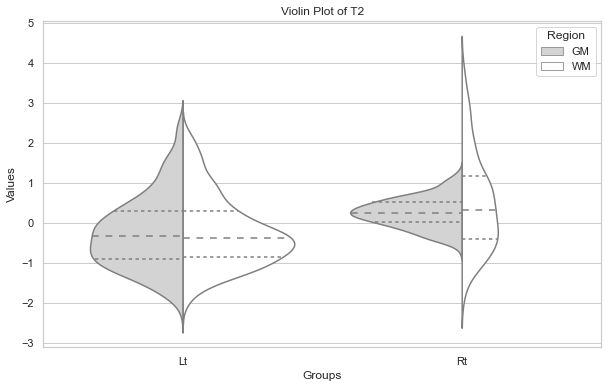

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x='Groups', y='Values', hue = 'Region', data=T1_df, palette=['#D3D3D3', '#FFFFFF'], split=True, inner="quart")  # You can use 'box' for boxplot inside violin

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Violin Plot of T1')
plt.savefig(os.path.join(folder, 'T1_violinplot.tif'), dpi=600)
plt.close

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x='Groups', y='Values', hue = 'Region', data=T2_df, palette=['#D3D3D3', '#FFFFFF'], split=True, inner="quart")  # You can use 'box' for boxplot inside violin

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Violin Plot of T2')
plt.savefig(os.path.join(folder, 'T2_violinplot.tif'), dpi=600)
plt.close

<function matplotlib.pyplot.close(fig=None)>

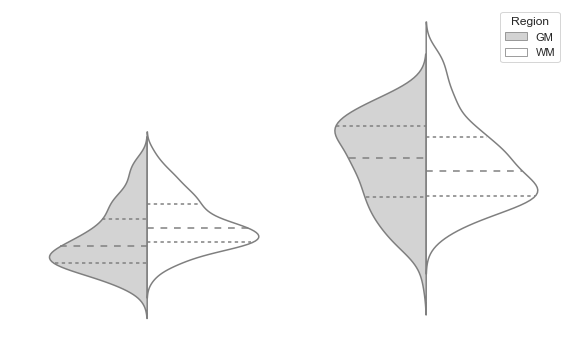

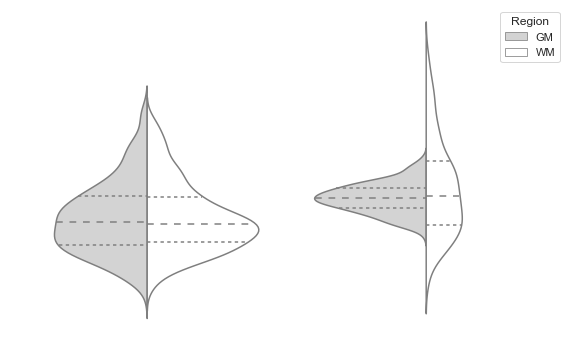

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x='Groups', y='Values', hue = 'Region', data=T1_df, palette=['#D3D3D3', '#FFFFFF'], split=True, inner="quart")  # You can use 'box' for boxplot inside violin

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Values')

plt.axis('off')
plt.savefig(os.path.join(folder, 'T1_violinplot_wo_annotation.tif'), dpi=600)
plt.close


plt.figure(figsize=(10, 6))
sns.violinplot(x='Groups', y='Values', hue = 'Region', data=T2_df, palette=['#D3D3D3', '#FFFFFF'], split=True, inner="quart")  # You can use 'box' for boxplot inside violin

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Values')

plt.axis('off')
plt.savefig(os.path.join(folder, 'T2_violinplot_wo_annotation.tif'), dpi=600)
plt.close